<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/FirstSKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe

These requirements should normally be satisfied, they are dependencies for gspread to pull the dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

from sklearn.linear_model import LinearRegression

Import necessary libraries to create dataframe, regression, and formatting of regression (plotting) Gspread creates dataframe from sheets file

In [ ]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

This will create authorization through google sheets (follow link that appears and copy authorization code)

In [ ]:
sheet1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1NIbzVL45WRkEXoIiaATK3O_wHiVv2iJI-SsyhSt_Qh8/edit#gid=0')

sheet1 is entire csv file URL is sheets file URL

In [ ]:
ws = sheet1.worksheet('Data')

This is the tab in csv file

In [ ]:
data = get_as_dataframe(ws)

titles the dataframe extracted from sheets file

In [ ]:
data

,SAT,GPA,"Rand 1,2,3",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1634.0,3.42,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1663.0,3.20,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1664.0,2.52,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1670.0,2.91,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1674.0,3.17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is calling the dataframe and representing from Pandas. NaN cells are empty values

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=0 is rows how is any or all, inplace True removes from the dataframe

In [ ]:
data.dropna(axis=1, how='all', inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=1 is columns how is any or all, inplace True removes from the dataframe

In [ ]:
data

,SAT,GPA,"Rand 1,2,3"
0,1634.0,3.42,2.0
1,1663.0,3.20,3.0
2,1664.0,2.52,3.0
3,1670.0,2.91,1.0
4,1674.0,3.17,2.0
...,...,...,...
79,2020.0,3.28,1.0
80,2020.0,3.65,2.0
81,2021.0,3.61,3.0
82,2041.0,3.51,3.0


calls the corrected dataframe

In [ ]:
x = data['SAT']
y = data['GPA']

Label each variable to indicate it's role.. y = target   x = feature. Target is the dependent variable that will be predicted by regression. Feature is the independent variable that is used to perform analysis. 

In [ ]:
x.shape

(84,)

In [ ]:
y.shape

(84,)

Due to the target and feature being 1 dimensional lists they need to be converted into an array and reshaped to be a matrix. This is due to sklearns syntax both in the array as well as the reshape method. 

In [ ]:
x_matrix = np.array(x).reshape(-1,1)

This process takes the data related to dataframe x and transforms it to an array, then processes it to create a new array with a height of 84 items and a width of 2

In [ ]:
x_matrix.shape

(84, 1)

calling the matrix's shape to verify the function worked

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

copy_X indicates that the array was copied to perform the function. fit_intercept automatically adds constant like sm.add_constant previously had. normalize = noramlization of the data

In [ ]:
reg.score(x_matrix, y)

0.40485858230360283

R-Squared of the data

In [ ]:
reg.coef_

array([0.00165456])

To analyze the coefficient(s)

In [ ]:
reg.intercept_

0.27768942343337466

To analyze the constant

In [ ]:
reg.predict([[1740]])

array([3.15662747])

runs predict formula for the given variable put in (In this case predicting the GPA of a student whose SAT equaled 1740. This has to be put inside two sets of brackets to indicate a matrix. Sklearn requires a 2 dimensional array to predict from. 

In [ ]:
new_data = pd.DataFrame(data=[1740, 1760],columns=['SAT'])

Another example of the predict function of Sklearn, this is creating a new pandas dataframe. data is an array with values applied to SAT, these can be dynamic dataframes.

In [ ]:
new_data

,SAT
0,1740
1,1760


In [ ]:
reg.predict(new_data)

array([3.15662747, 3.18971871])

predicts the GPA's of the students based upon the SAT scores that were included in the above dataframe

In [ ]:
new_data['Predicted_GPA'] = reg.predict(new_data)

This adds a column to the dataframe including the Targets (Predicted GPA's of the student's corresponding to the SAT)

In [ ]:
new_data

,SAT,Predicted_GPA
0,1740,3.156627
1,1760,3.189719


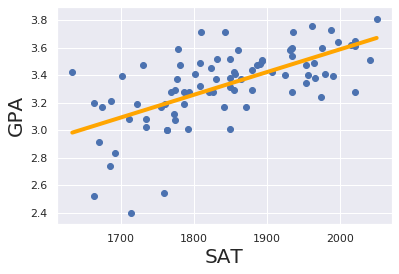

In [ ]:
plt.scatter(x, y)
yhat = reg.coef_*x_matrix +reg.intercept_
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

This plots the line of regression for the data. Pulls all of the SAT data from the google sheet, and makes a predictive analysis for the expected GPA